# The Sparks Foundation - GRIP June 23

### Data Science and Business Analysis
### Name : Bhushan Sonawane
### Task 1 : Prediction Using Supervised ML

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing data
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


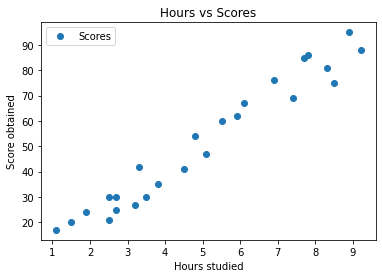

In [10]:
# Plotting of scores
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.show()

#### From the above graph, we can clearly interpret that hours studied and marks obtained are having a positive linear relation.

## Preparing Data

In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [19]:
# Training the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

## Training the algorithm

In [20]:
# Fitting the data
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(Xtrain, ytrain)

print('Training Completed')

Training Completed


In [21]:
# Formula for regression line
line = LR.coef_*X+LR.intercept_

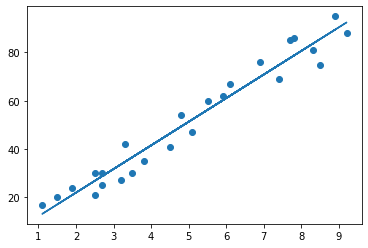

In [22]:
# Plotting the regression line graph
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

## Predictions

In [23]:
# Predicting the scores
print(Xtest)
ypred = LR.predict(Xtest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [24]:
# Comparing actual vs predicted
df = pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Q. What will be the predicted score if a student studies for 9.25 hrs/day?

In [29]:
hours = 9.25
pred = LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


### As evaluated above if a student studies for 9.25 hrs/day then he/she can secure 92.91 percentage

## Evaluating Model

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred)) 

Mean Absolute Error: 4.419727808027652
